In [1]:
import pandas as pd
class2 = pd.read_csv("C:\\Users\\516-29\\chap10\\data\\class2.csv")

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()
train_x = label_encoder.fit_transform(class2['class2'])
train_x

array([2, 2, 1, 0, 1, 0])

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is last chance.',
    'and if you do not have this chance.',
    'you will never get any chance.',
    'will you do get this one?',
    'please, get this chance',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 13,
 'is': 7,
 'last': 8,
 'chance': 2,
 'and': 0,
 'if': 6,
 'you': 15,
 'do': 3,
 'not': 10,
 'have': 5,
 'will': 14,
 'never': 9,
 'get': 4,
 'any': 1,
 'one': 11,
 'please': 12}

In [3]:
vect.transform(['you will never get any chance.']).toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]])

In [4]:
vect = CountVectorizer(stop_words=["and", "is", "please", "this"]).fit(corpus)
vect.vocabulary_

{'last': 6,
 'chance': 1,
 'if': 5,
 'you': 11,
 'do': 2,
 'not': 8,
 'have': 4,
 'will': 10,
 'never': 7,
 'get': 3,
 'any': 0,
 'one': 9}

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc = ['I like machine learning', 'I love deep learning', 'I run everyday']
tfidf_vectorizer = TfidfVectorizer(min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(doc)
doc_distance = (tfidf_matrix * tfidf_matrix.T)

print('유사도를 위한', str(doc_distance.get_shape()[0]), 'x', str(doc_distance.get_shape()[1]), '행렬을 만들었습니다.')
print(doc_distance.toarray())

유사도를 위한 3 x 3 행렬을 만들었습니다.
[[1.       0.224325 0.      ]
 [0.224325 1.       0.      ]
 [0.       0.       1.      ]]


In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action='ignore')
import gensim
from gensim.models import Word2Vec

sample = open("C:\\Users\\516-29\\chap10\\data\\peter.txt", "r", encoding='UTF8')
s = sample.read()

f = s.replace("\n", " ")
data = []

for i in sent_tokenize(f):
    temp = []
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

data

[['once',
  'upon',
  'a',
  'time',
  'in',
  'london',
  ',',
  'the',
  'darlings',
  'went',
  'out',
  'to',
  'a',
  'dinner',
  'party',
  'leaving',
  'their',
  'three',
  'children',
  'wendy',
  ',',
  'jhon',
  ',',
  'and',
  'michael',
  'at',
  'home',
  '.'],
 ['after',
  'wendy',
  'had',
  'tucked',
  'her',
  'younger',
  'brothers',
  'jhon',
  'and',
  'michael',
  'to',
  'bed',
  ',',
  'she',
  'went',
  'to',
  'read',
  'a',
  'book',
  '.'],
 ['she', 'heard', 'a', 'boy', 'sobbing', 'outside', 'her', 'window', '.'],
 ['he', 'was', 'flying', '.'],
 ['there', 'was', 'little', 'fairy', 'fluttering', 'around', 'him', '.'],
 ['wendy', 'opened', 'the', 'window', 'to', 'talk', 'to', 'him', '.'],
 ['“', 'hello', '!'],
 ['who', 'are', 'you', '?'],
 ['why', 'are', 'you', 'crying', '”', ',', 'wendy', 'asked', 'him', '.'],
 ['“', 'my', 'name', 'is', 'peter', 'pan', '.'],
 ['my',
  'shadow',
  'wouldn',
  '’',
  't',
  'stock',
  'to',
  'me.',
  '”',
  ',',
  'he',
  'rep

In [7]:
model1 = gensim.models.Word2Vec(data, min_count=1, vector_size=100, window=5, sg=0)

print("Cosine similarity between 'peter' " + "'wendy' - CBOW : ",
      model1.wv.similarity('peter', 'wendy'))

Cosine similarity between 'peter' 'wendy' - CBOW :  -0.08294406


In [8]:
print("Cosine similarity between 'peter' " + "'hook' - CBOW : ", model1.wv.similarity('peter', 'hook'))

Cosine similarity between 'peter' 'hook' - CBOW :  -0.058279652


In [9]:
model2 = gensim.models.Word2Vec(data, min_count=1, vector_size=100, window=5, sg=1)

print("Cosine similarity between 'peter' " + "'wendy' - Skip Gram : ", model2.wv.similarity('peter', 'wendy'))

Cosine similarity between 'peter' 'wendy' - Skip Gram :  0.27075687


In [10]:
print("Cosine similarity between 'peter' " + "'hook' - Skip Gram : ", model2.wv.similarity('peter', 'hook'))

Cosine similarity between 'peter' 'hook' - Skip Gram :  0.455733


In [11]:
from gensim.test.utils import common_texts
from gensim.models import FastText

model = FastText('..\chap10\data\peter.txt', vector_size=4, window=3, min_count=1, epochs=10)

In [12]:
sim_score = model.wv.similarity('peter', 'wendy')
print(sim_score)

0.4592452


In [13]:
sim_score = model.wv.similarity('peter', 'hook')
print(sim_score)

0.043825716


In [14]:
from __future__ import print_function
from gensim.models import KeyedVectors
model_kr = KeyedVectors.load_word2vec_format(
    'C:\\Users\\516-29\\chap10\\data\\wiki.ko.vec',
    limit=50000
)

In [15]:
find_similar_to = '노력'

for similar_word in model_kr.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.2f}".format(
        similar_word[0], similar_word[1]
    ))

Word: 노력과, Similarity: 0.71
Word: 노력의, Similarity: 0.69
Word: 노력은, Similarity: 0.66
Word: 노력이, Similarity: 0.64
Word: 노력으로, Similarity: 0.64
Word: 노력을, Similarity: 0.64
Word: 노력하는, Similarity: 0.63
Word: 노력에, Similarity: 0.62
Word: 역량, Similarity: 0.60
Word: 노력한, Similarity: 0.60


In [16]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('C:\\Users\\516-29\\chap10\\data\\glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [17]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
model.most_similar('bill')

[('legislation', 0.8072139620780945),
 ('proposal', 0.7306863069534302),
 ('senate', 0.7142541408538818),
 ('bills', 0.704440176486969),
 ('measure', 0.6958035230636597),
 ('passed', 0.6906244158744812),
 ('amendment', 0.6846879720687866),
 ('provision', 0.6845567226409912),
 ('plan', 0.6816462874412537),
 ('clinton', 0.6663140654563904)]

In [18]:
model.most_similar('cherry')

[('peach', 0.688809871673584),
 ('mango', 0.683819055557251),
 ('plum', 0.6684104204177856),
 ('berry', 0.659035861492157),
 ('grove', 0.6581551432609558),
 ('blossom', 0.6503506302833557),
 ('raspberry', 0.6477391719818115),
 ('strawberry', 0.6442098021507263),
 ('pine', 0.6390928626060486),
 ('almond', 0.6379212737083435)]

In [19]:
model.most_similar(negative=['cherry'])

[('kazushige', 0.48343509435653687),
 ('askerov', 0.4778185784816742),
 ('lakpa', 0.46915262937545776),
 ('ex-gay', 0.45713329315185547),
 ('tadayoshi', 0.4522106647491455),
 ('turani', 0.4481006860733032),
 ('saglam', 0.4469599425792694),
 ('aijun', 0.4435270130634308),
 ('adjustors', 0.44235295057296753),
 ('nyum', 0.4423118233680725)]

In [20]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [21]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]
analogy('australia', 'beer', 'france')

'champagne'

In [22]:
analogy('tall', 'tallest', 'long')

'longest'

In [23]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [24]:
from __future__ import unicode_literals, print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd

import os
import re
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [25]:
SOS_token = 0
EOS_token = 1
MAX_LENGTH = 20

class Lang:
    def __init__(self):
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [26]:
def normalizeString(df, lang):
    sentence = df[lang].str.lower()
    sentence = sentence.str.replace('[^A-Za-z\s]+', ' ')
    sentence = sentence.str.normalize('NFD')
    sentence = sentence.str.encode('ascii', errors='ignore').str.decode('utf-8')
    return sentence

def read_sentence(df, lang1, lang2):
    sentence1 = normalizeString(df, lang1)
    sentence2 = normalizeString(df, lang2)
    return sentence1, sentence2

def read_file(loc, lang1, lang2):
    df = pd.read_csv(loc, delimiter='\t', header=None, names=[lang1, lang2])
    return df

def process_data(lang1,lang2):
    df = read_file('C:\\Users\\516-29\\chap10\\data\\%s-%s.txt' % (lang1, lang2), lang1, lang2)
    sentence1, sentence2 = read_sentence(df, lang1, lang2)

    input_lang = Lang()
    output_lang = Lang()
    pairs = []
    for i in range(len(df)):
        if len(sentence1[i].split(' ')) < MAX_LENGTH and len(sentence2[i].split(' ')) < MAX_LENGTH:
            full = [sentence1[i], sentence2[i]]
            input_lang.addSentence(sentence1[i])
            output_lang.addSentence(sentence2[i])
            pairs.append(full)

    return input_lang, output_lang, pairs

In [27]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(input_lang, output_lang, pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return(input_tensor, target_tensor)

In [28]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, embbed_dim, num_layers):
        super(Encoder, self).__init__()
        self.input_dim = input_dim
        self.embbed_dim = embbed_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_dim, self.embbed_dim)
        self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)

    def forward(self, src):
        embedded = self.embedding(src).view(1, 1, -1)
        outputs, hidden = self.gru(embedded)
        return outputs, hidden

In [29]:
class Decoder(nn.Module):
    def __init__(self, output_dim, hidden_dim, embbed_dim, num_layers):
        super(Decoder, self).__init__()

        self.embbed_dim = embbed_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.num_layers = num_layers

        self.embedding = nn.Embedding(output_dim, self.embbed_dim)
        self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)
        self.out = nn.Linear(self.hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        input = input.view(1, -1)
        embedded = F.relu(self.embedding(input))
        output, hidden = self.gru(embedded, hidden)
        prediction = self.softmax(self.out(output[0]))
        return prediction, hidden

In [30]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device, MAX_LENGTH=MAX_LENGTH):
        super().__init__()

        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, input_lang, output_lang, teacher_forcing_ratio=0.5):
        input_length = input_lang.size(0)
        batch_size = output_lang.shape[1]
        target_length = output_lang.shape[0]
        vocab_size = self.decoder.output_dim
        outputs = torch.zeros(target_length, batch_size, vocab_size).to(self.device)
        
        for i in range(input_length):
            encoder_output, encoder_hidden = self.encoder(input_lang[i])
        decoder_hidden = encoder_hidden.to(device)
        decoder_input = torch.tensor([SOS_token], device=device)

        for t in range(target_length):
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
            outputs[t] = decoder_output
            teacher_force = random.random() < teacher_forcing_ratio
            topv, topi = decoder_output.topk(1)
            input = (output_lang[t] if teacher_force else topi)
            if(teacher_force == False and input.item() == EOS_token):
                break
        return outputs

In [31]:
teacher_forcing_ratio = 0.5

def Model(model, input_tensor, target_tensor, model_optimizer,  criterion):
    model_optimizer.zero_grad()
    input_length = input_tensor.size(0)
    loss = 0
    epoch_loss = 0
    output = model(input_tensor, target_tensor)
    num_iter = output.size(0)

    for ot in range(num_iter):
        loss += criterion(output[ot], target_tensor[ot])
    loss.backward()
    model_optimizer.step()
    epoch_loss = loss.item() / num_iter
    return epoch_loss

In [32]:
def trainModel(model, input_lang, output_lang, pairs, num_iteration=20000):
    model.train()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.NLLLoss()
    total_loss_iterations = 0

    training_pairs = [tensorsFromPair(input_lang, output_lang, random.choice(pairs)) for i in range(num_iteration)]

    for iter in range(1, num_iteration+1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]
        loss = Model(model, input_tensor, target_tensor, optimizer, criterion)
        total_loss_iterations += loss

        if iter % 5000 == 0:
            average_loss= total_loss_iterations / 5000
            total_loss_iterations = 0
            print('%d %.4f' % (iter, average_loss))

    torch.save(model.state_dict(), 'C:\\Users\\516-29\\chap10\\data\\mytraining.pt')
    return model

In [33]:
def evaluate(model, input_lang, output_lang, sentences, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentences[0])
        output_tensor = tensorFromSentence(output_lang, sentences[1])
        decoded_words = []
        output = model(input_tensor, output_tensor)

        for ot in range(output.size(0)):
            topv, topi = output[ot].topk(1)
            
            if topi[0].item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi[0].item()])

    return decoded_words

def evaluateRandomly(model, input_lang, output_lang, pairs, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('input {}'.format(pair[0]))
        print('output {}'.format(pair[1]))
        output_words = evaluate(model, input_lang, output_lang, pair)
        output_sentence = ' '.join(output_words)
        print('predicted {}'.format(output_sentence))

In [34]:
lang1 = 'eng'
lang2 = 'fra'
input_lang, output_lang, pairs = process_data(lang1, lang2)

randomize = random.choice(pairs)
print('random sentence {}'.format(randomize))

input_size = input_lang.n_words
output_size = output_lang.n_words
print('Input : {} Output : {}'.format(input_size, output_size))

embed_size = 256
hidden_size = 512
num_layers = 1
num_iteration = 10000

encoder = Encoder(input_size, hidden_size, embed_size, num_layers)
decoder = Decoder(output_size, hidden_size, embed_size, num_layers)
model = Seq2Seq(encoder, decoder, device).to(device)

print(encoder)
print(decoder)

model = trainModel(model, input_lang, output_lang, pairs, num_iteration)

random sentence ['how much do you charge to fix a flat tire?', 'combien prenez-vous pour reparer un pneu a plat ?']
Input : 23191 Output : 39387
Encoder(
  (embedding): Embedding(23191, 256)
  (gru): GRU(256, 512)
)
Decoder(
  (embedding): Embedding(39387, 256)
  (gru): GRU(256, 512)
  (out): Linear(in_features=512, out_features=39387, bias=True)
  (softmax): LogSoftmax(dim=1)
)
5000 4.9938


KeyboardInterrupt: 

In [ ]:
evaluateRandomly(model, input_lang, output_lang, pairs)

In [ ]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0), encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

In [ ]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0
    plot_loss_total = 0

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(input_lang, output_lang, random.choice(pairs)) for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]
        loss = Model(model, input_tensor, target_tensor, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % 5000 == 0:
            print_loss_avg = print_loss_total / 5000
            print_loss_total = 0
            print('%d, %.4f' % (iter, print_loss_avg))

In [35]:
import time

embed_size = 256
hidden_size = 512
num_layers = 1
input_size = input_lang.n_words
output_size = output_lang.n_words

encoder1 = Encoder(input_size, hidden_size, embed_size, num_layers)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_size, dropout_p=0.1).to(device)
print(encoder1)
print(attn_decoder1)

attn_model = trainIters(encoder1, attn_decoder1, 10000, print_every=5000, plot_every=100, learning_rate=0.01)

NameError: name 'AttnDecoderRNN' is not defined

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from pytorch_transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
train_df = pd.read_csv('C:\\Users\\516-29\\chap10\\data\\training.txt', sep='\t')
valid_df = pd.read_csv('C:\\Users\\516-29\\chap10\\data\\validing.txt', sep='\t')
test_df = pd.read_csv('C:\\Users\\516-29\\chap10\\data\\testing.txt', sep='\t')

In [3]:
class Datasets(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.df.iloc[idx, 1]
        label = self.df.iloc[idx, 2]
        return text, label

In [4]:
train_dataset = Datasets(train_df)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)

valid_dataset = Datasets(valid_df)
valid_loader = DataLoader(valid_dataset, batch_size=2, shuffle=True, num_workers=0)

test_dataset = Datasets(test_df)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=True, num_workers=0)

In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.to(device)

C:\Users\516-29\anaconda3\envs\torch\lib\site-packages\pytorch_transformers\modeling_utils.py:539: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(reso

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [6]:
def train(model,
          optimizer,
          criterion=nn.BCELoss(),
          num_epochs=2,
          eval_every=len(train_loader)//2,
          best_valid_loss=float("Inf")):

    total_correct = 0.0
    total_len = 0.0
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    model.train()
    for epoch in range(num_epochs):
        for text, label in train_loader:
            optimizer.zero_grad()
            encoded_list = [tokenizer.encode(t, add_special_tokens=True)[:128] for t in text]
            padded_list = [e + [0] * (128-len(e)) for e in encoded_list]
            sample = torch.tensor(padded_list)
            sample, label = sample.to(device), label.to(device)
            labels = torch.tensor(label)
            outputs = model(sample, labels=labels)
            loss, logits = outputs

            pred = torch.argmax(F.softmax(logits, dim=1), dim=1)
            correct = pred.eq(labels)
            total_correct += correct.sum().item()
            total_len += len(labels)
            running_loss += loss.item()
            loss.backward()
            optimizer.step()
            global_step += 1

            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():
                    for text, label in valid_loader:
                        encoded_list = [tokenizer.encode(t, add_special_tokens=True)[:128] for t in text]
                        padded_list = [e + [0] * (128-len(e)) for e in encoded_list]
                        sample = torch.tensor(padded_list)
                        sample, label = sample.to(device), label.to(device)
                        labels = torch.tensor(label)
                        outputs = model(sample, labels=labels)
                        loss, logits = outputs
                        valid_running_loss += loss.item()

                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                running_loss = 0.0
                valid_running_loss = 0.0
                model.train()

                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader), average_train_loss, average_valid_loss))

                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint('C:\\Users\\516-29\\chap10\\data\\model.pt', model, best_valid_loss)
                    save_metrics('C:\\Users\\516-29\\chap10\\data\\metrics.pt', train_loss_list, valid_loss_list, global_steps_list)

    save_metrics('C:\\Users\\516-29\\chap10\\data\\metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('훈련 종료!')

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=2e-5)
train(model=model, optimizer=optimizer)

C:\Users\516-29\AppData\Local\Temp\ipykernel_16096\2014735330.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(label)


Model loaded from <== C:\Users\516-29\chap10\data\metrics.pt


C:\Users\516-29\AppData\Local\Temp\ipykernel_9048\3866183658.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(load_path, map_location=device)


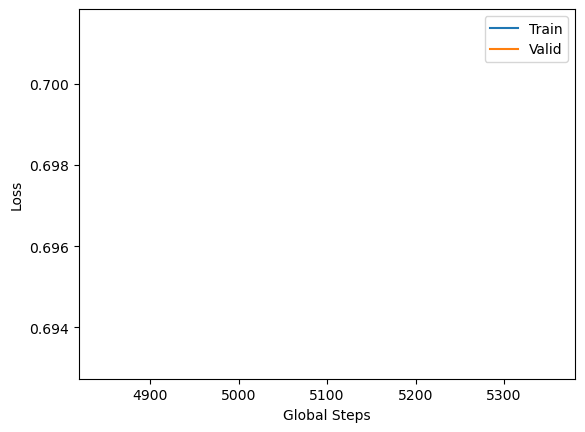

In [14]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics('C:\\Users\\516-29\\chap10\\data\\metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
def evaluate(model, test_loader):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
        for text, label in test_loader:
            encoded_list = [tokenizer.encode(t, add_special_tokens=True)[:128] for t in text]
            padded_list = [e + [0]*(128-len(e)) if len(e)<128 else e for e in encoded_list]
            sample = torch.LongTensor(padded_list).to(device)
            labels = label.to(device)

            loss, logits = model(sample, labels=labels)
            y_pred.extend(torch.argmax(logits, 1).tolist())
            y_true.extend(labels.tolist())

    print('Classification 결과:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt="d")
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])

In [16]:
best_model = model.to(device)
load_checkpoint('C:\\Users\\516-29\\chap10\\data\\model.pt', best_model)
evaluate(best_model, test_loader)

C:\Users\516-29\AppData\Local\Temp\ipykernel_9048\3866183658.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(load_path, map_location=device)


Model loaded from <== C:\Users\516-29\chap10\data\model.pt


KeyboardInterrupt: 

In [61]:
import torch
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [62]:
text = "나는 파이토치를 이용한 딥러닝을 학습중이다."
marked_text = "[CLS] " + text + " [SEP]"
tokenized_text = tokenizer.tokenize(marked_text)
print(tokenized_text)

['[CLS]', '나는', '파', '##이', '##토', '##치를', '이', '##용한', '딥', '##러', '##닝', '##을', '학', '##습', '##중', '##이다', '.', '[SEP]']


In [63]:
text = "과수원에 사과가 많았다." \
       "친구가 나에게 사과했다." \
       "백설공주는 독이 든 사과를 먹었다."
marked_text = "[CLS] " + text + " [SEP]"
tokenized_text = tokenizer.tokenize(marked_text)
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
과             8,898
##수          15,891
##원에         108,280
사             9,405
##과          11,882
##가          11,287
많             9,249
##았다         27,303
.               119
친             9,781
##구          17,196
##가          11,287
나             8,982
##에게         26,212
사             9,405
##과          11,882
##했다         12,490
.               119
백             9,331
##설          31,928
##공          28,000
##주는         100,633
독             9,088
##이          10,739
든             9,115
사             9,405
##과          11,882
##를          11,513
먹             9,266
##었다         17,706
.               119
[SEP]           102


In [64]:
segments_ids = [1] * len(tokenized_text)
print(segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [65]:
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [66]:
model = BertModel.from_pretrained('bert-base-multilingual-cased', output_hidden_states=True)
model.eval()

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [67]:
with torch.no_grad():
    outputs = model(tokens_tensor, segments_tensors)
    hidden_states = outputs[2]

In [68]:
print("계층 개수:", len(hidden_states), " (initial embeddings + 12 BERT layers)")
layer_i = 0
print("배치 개수:", len(hidden_states[layer_i]))
batch_i = 0
print("토큰 개수:", len(hidden_states[layer_i][batch_i]))
token_i = 0
print("은닉층의 유닛 개수:", len(hidden_states[layer_i][batch_i][token_i]))

계층 개수: 13  (initial embeddings + 12 BERT layers)
배치 개수: 1
토큰 개수: 33
은닉층의 유닛 개수: 768


In [69]:
print('은닉 상태의 유형:', type(hidden_states))
print('각 계층에서의 텐서 형태:', hidden_states[0].size())

은닉 상태의 유형: <class 'tuple'>
각 계층에서의 텐서 형태: torch.Size([1, 33, 768])


In [70]:
token_embeddings = torch.stack(hidden_states, dim=0)
token_embeddings.size()

torch.Size([13, 1, 33, 768])

In [71]:
token_embeddings=torch.squeeze(token_embeddings, dim=1)
token_embeddings.size()

torch.Size([13, 33, 768])

In [72]:
token_embeddings = token_embeddings.permute(1, 0, 2)
token_embeddings.size()

torch.Size([33, 13, 768])

In [73]:
token_vecs_cat = []
for token in token_embeddings:
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    token_vecs_cat.append(cat_vec)
print('형태는: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

형태는: 33 x 3072


In [74]:
token_vecs_sum = []
for token in token_embeddings:
    sum_vec = torch.sum(token[-4:], dim=0)
    token_vecs_sum.append(sum_vec)
print('형태는: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

형태는: 33 x 768


In [75]:
token_vecs = hidden_states[-2][0]
sentence_embedding = torch.mean(token_vecs, dim=0)
print("최종 임베딩 벡터의 형태:", sentence_embedding.size())

최종 임베딩 벡터의 형태: torch.Size([768])


In [76]:
for i, token_str in enumerate(tokenized_text):
    print(i, token_str)

0 [CLS]
1 과
2 ##수
3 ##원에
4 사
5 ##과
6 ##가
7 많
8 ##았다
9 .
10 친
11 ##구
12 ##가
13 나
14 ##에게
15 사
16 ##과
17 ##했다
18 .
19 백
20 ##설
21 ##공
22 ##주는
23 독
24 ##이
25 든
26 사
27 ##과
28 ##를
29 먹
30 ##었다
31 .
32 [SEP]


In [77]:
print("사과가 많았다", str(token_vecs_sum[6][:5]))
print("나에게 사과했다", str(token_vecs_sum[10][:5]))
print("사과를 먹었다", str(token_vecs_sum[19][:5]))

사과가 많았다 tensor([-0.5844, -4.0836,  0.4906,  0.8915, -1.8054])
나에게 사과했다 tensor([-0.8631, -3.4047, -0.7351,  0.9805, -2.6700])
사과를 먹었다 tensor([ 0.6756, -0.3618,  0.0586,  2.2050, -2.4193])


In [78]:
from scipy.spatial.distance import cosine
diff_apple = 1 - cosine(token_vecs_sum[5], token_vecs_sum[27])
same_apple = 1 - cosine(token_vecs_sum[5], token_vecs_sum[16])
print('*유사한* 의미에 대한 벡터 유사성: %.2f' % same_apple)
print('*다른* 의미에 대한 벡터 유사성: %.2f' % diff_apple)

*유사한* 의미에 대한 벡터 유사성: 0.86
*다른* 의미에 대한 벡터 유사성: 0.91
